In [1]:
import math ,copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

In [2]:
data = pd.read_csv("ChatsDataset.csv")

In [3]:
data.iloc[:, :2].head(10)

,Message 1,Message 2
0,I'm going to learn how to bake a chocolate cak...,Baking a chocolate cake is delicious! What's y...
1,I'm planning a weekend getaway by the lake. 🌅,Weekend getaways by the lake are so relaxing! ...
2,I'm going to a rock music concert. 🎸,Rock concerts are energetic! Which rock band a...
3,I'm planning a day at the beach with my family...,Beach days with family are fun! What beach act...
4,I'm going to start a new workout routine. 💪,Starting a new workout routine is great for yo...
5,I'm planning a barbecue in my backyard. 🍔,Barbecues are tasty! What's your special barbe...
6,I'm going to learn how to salsa dance. 💃,Learning to dance salsa is exciting! Have you ...
7,I'm planning a visit to an art gallery. 🖼️,Art galleries are inspiring! Do you have a fav...
8,I'm going to a basketball game. 🏀,Basketball games are thrilling! Which teams ar...
9,I'm planning a day at the amusement park. 🎢,Amusement parks are so much fun! What's your f...


In [4]:
df = data.copy()

In [5]:
df.head()

,Message 1,Message 2,Response,M1 Send Time,M2 Receive Time,Number of Words (M1),Number of Punctuation (M1),Presence of Emojis (M1),Presence of Images (M1),Presence of Videos (M1),Presence of Links (M1),Number of Words (M2),Number of Punctuation (M2),Presence of Emojis (M2),Presence of Images (M2),Presence of Videos (M2),Presence of Links (M2),TimeOfResponse
0,I'm going to learn how to bake a chocolate cak...,Baking a chocolate cake is delicious! What's y...,No,11/8/2023 21:45,11/9/2023 21:45,8,3,Yes,No,No,No,9,3,Yes,No,No,No,8.481981
1,I'm planning a weekend getaway by the lake. 🌅,Weekend getaways by the lake are so relaxing! ...,No,11/8/2023 21:50,11/8/2023 21:55,8,3,Yes,No,No,No,8,3,Yes,No,No,No,3.448191
2,I'm going to a rock music concert. 🎸,Rock concerts are energetic! Which rock band a...,No,11/8/2023 21:55,11/8/2023 22:00,6,3,Yes,No,No,No,9,3,Yes,No,No,No,4.154956
3,I'm planning a day at the beach with my family...,Beach days with family are fun! What beach act...,No,11/8/2023 22:00,11/8/2023 22:05,8,3,Yes,No,No,No,8,3,Yes,No,No,No,6.981599
4,I'm going to start a new workout routine. 💪,Starting a new workout routine is great for yo...,No,11/8/2023 22:05,11/8/2023 22:10,7,3,Yes,No,No,No,9,3,Yes,No,No,No,11.389429


In [6]:
data.columns

Index(['Message 1', 'Message 2', 'Response', 'M1 Send Time', 'M2 Receive Time',
       'Number of Words (M1)', 'Number of Punctuation (M1)',
       'Presence of Emojis (M1)', 'Presence of Images (M1)',
       'Presence of Videos (M1)', 'Presence of Links (M1)',
       'Number of Words (M2)', 'Number of Punctuation (M2)',
       'Presence of Emojis (M2)', 'Presence of Images (M2)',
       'Presence of Videos (M2)', 'Presence of Links (M2)', 'TimeOfResponse'],
      dtype='object')

In [7]:
data.rename(columns={'Message 1': 'M1',
                   'Message 2': 'M2',
                   'M1 Send Time': 'SendTime', 
                   'M2 Receive Time': 'RecTime',
                   'Number of Words (M1)': 'WC-M1',
                   'Number of Punctuation (M1)': 'PC-M1',
                   'Presence of Emojis (M1)':'EC-M1',
                   'Presence of Images (M1)':'IC-M1',
                   'Presence of Videos (M1)':'VC-M1',
                   'Presence of Links (M1)':'LC-M1',
                   'Number of Words (M2)':'WC-M2',
                   'Number of Punctuation (M2)':'PC-M2',
                   'Presence of Emojis (M2)':'EC-M2',
                   'Presence of Images (M2)':'IC-M2',
                   'Presence of Videos (M2)':'VC-M2',
                   'Presence of Links (M2)':'LC-M2',
                    'Unnamed: 18': 'TimeOfResp '
                  }, inplace=True)


In [8]:
data.head()

,M1,M2,Response,SendTime,RecTime,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,TimeOfResponse
0,I'm going to learn how to bake a chocolate cak...,Baking a chocolate cake is delicious! What's y...,No,11/8/2023 21:45,11/9/2023 21:45,8,3,Yes,No,No,No,9,3,Yes,No,No,No,8.481981
1,I'm planning a weekend getaway by the lake. 🌅,Weekend getaways by the lake are so relaxing! ...,No,11/8/2023 21:50,11/8/2023 21:55,8,3,Yes,No,No,No,8,3,Yes,No,No,No,3.448191
2,I'm going to a rock music concert. 🎸,Rock concerts are energetic! Which rock band a...,No,11/8/2023 21:55,11/8/2023 22:00,6,3,Yes,No,No,No,9,3,Yes,No,No,No,4.154956
3,I'm planning a day at the beach with my family...,Beach days with family are fun! What beach act...,No,11/8/2023 22:00,11/8/2023 22:05,8,3,Yes,No,No,No,8,3,Yes,No,No,No,6.981599
4,I'm going to start a new workout routine. 💪,Starting a new workout routine is great for yo...,No,11/8/2023 22:05,11/8/2023 22:10,7,3,Yes,No,No,No,9,3,Yes,No,No,No,11.389429


In [9]:
data.columns

Index(['M1', 'M2', 'Response', 'SendTime', 'RecTime', 'WC-M1', 'PC-M1',
       'EC-M1', 'IC-M1', 'VC-M1', 'LC-M1', 'WC-M2', 'PC-M2', 'EC-M2', 'IC-M2',
       'VC-M2', 'LC-M2', 'TimeOfResponse'],
      dtype='object')

In [10]:
df = data.drop(['M1','M2'], axis =1)

In [11]:
df['EC-M1'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['IC-M1'] = df['IC-M1'].replace({'Yes':1,'No':0})
df['VC-M1'] = df['VC-M1'].replace({'Yes':1,'No':0})
df['LC-M1'] = df['LC-M1'].replace({'Yes':1,'No':0})
df['EC-M2'] = df['EC-M1'].replace({'Yes':1,'No':0})
df['IC-M2'] = df['IC-M1'].replace({'Yes':1,'No':0})
df['VC-M2'] = df['VC-M1'].replace({'Yes':1,'No':0})
df['LC-M2'] = df['LC-M1'].replace({'Yes':1,'No':0})
df['Response'] = df['Response'].replace({'Yes':1,'No':0})
df.head(3)

,Response,SendTime,RecTime,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,TimeOfResponse
0,0,11/8/2023 21:45,11/9/2023 21:45,8,3,1,0,0,0,9,3,1,0,0,0,8.481981
1,0,11/8/2023 21:50,11/8/2023 21:55,8,3,1,0,0,0,8,3,1,0,0,0,3.448191
2,0,11/8/2023 21:55,11/8/2023 22:00,6,3,1,0,0,0,9,3,1,0,0,0,4.154956


In [12]:
df1= df.copy()

In [13]:
# df1['SendTime'] = pd.to_datetime(df1['SendTime'])
# df1['RecTime'] = pd.to_datetime(df1['RecTime'])

# df1['RespTime'] = (df1['RecTime'] - df1['SendTime']).dt.total_seconds() / 60


In [13]:
df1.drop(['SendTime','RecTime'],axis=1,inplace=True)

In [15]:
# df1.drop(['time (min)','RespTime'],axis=1 , inplace=True)

In [14]:
df1.head()

,Response,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,TimeOfResponse
0,0,8,3,1,0,0,0,9,3,1,0,0,0,8.481981
1,0,8,3,1,0,0,0,8,3,1,0,0,0,3.448191
2,0,6,3,1,0,0,0,9,3,1,0,0,0,4.154956
3,0,8,3,1,0,0,0,8,3,1,0,0,0,6.981599
4,0,7,3,1,0,0,0,9,3,1,0,0,0,11.389429


In [15]:
df1['TimeOfResponse'] = df1['TimeOfResponse'].round(0)

In [18]:
# df1.drop(['RespTime'],axis=1,inplace=True)
df1.columns

Index(['Response', 'WC-M1', 'PC-M1', 'EC-M1', 'IC-M1', 'VC-M1', 'LC-M1',
       'WC-M2', 'PC-M2', 'EC-M2', 'IC-M2', 'VC-M2', 'LC-M2', 'TimeOfResponse'],
      dtype='object')

In [16]:
df1.head()

,Response,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,TimeOfResponse
0,0,8,3,1,0,0,0,9,3,1,0,0,0,8.0
1,0,8,3,1,0,0,0,8,3,1,0,0,0,3.0
2,0,6,3,1,0,0,0,9,3,1,0,0,0,4.0
3,0,8,3,1,0,0,0,8,3,1,0,0,0,7.0
4,0,7,3,1,0,0,0,9,3,1,0,0,0,11.0


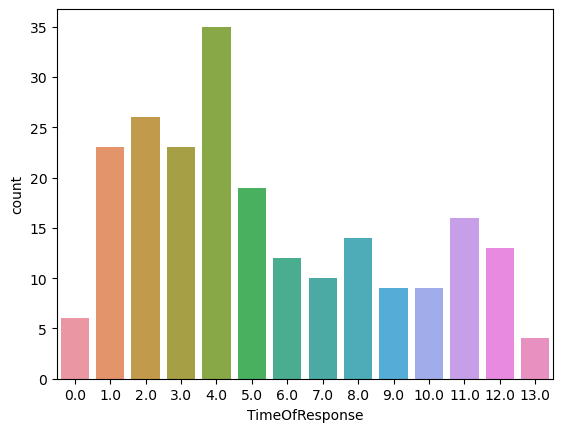

In [17]:
sns.countplot(x = df1['TimeOfResponse'])
plt.show()


In [19]:
df1.head()

,Response,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,TimeOfResponse
0,0,8,3,1,0,0,0,9,3,1,0,0,0,8.0
1,0,8,3,1,0,0,0,8,3,1,0,0,0,3.0
2,0,6,3,1,0,0,0,9,3,1,0,0,0,4.0
3,0,8,3,1,0,0,0,8,3,1,0,0,0,7.0
4,0,7,3,1,0,0,0,9,3,1,0,0,0,11.0


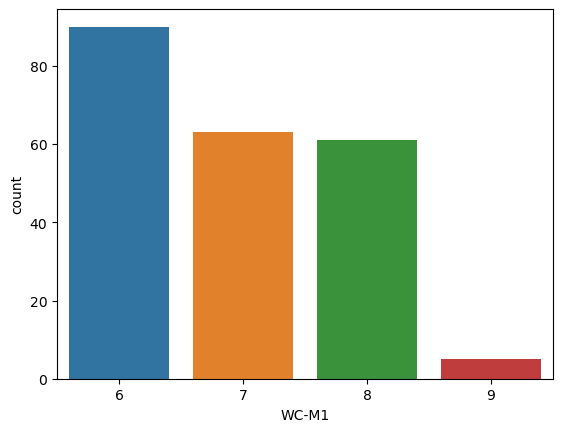

In [20]:
sns.countplot(x = df1['WC-M1'])
plt.show()

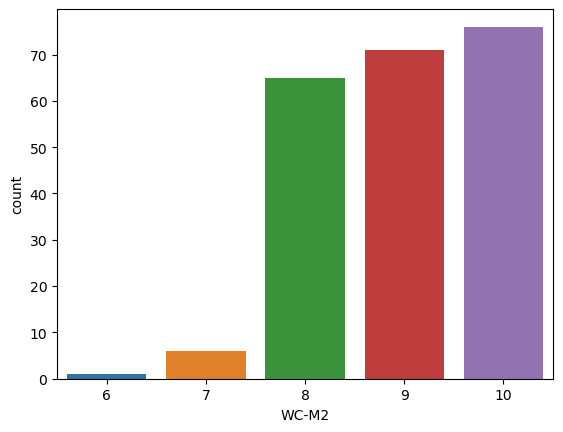

In [21]:
sns.countplot(x = df1['WC-M2'])
plt.show()

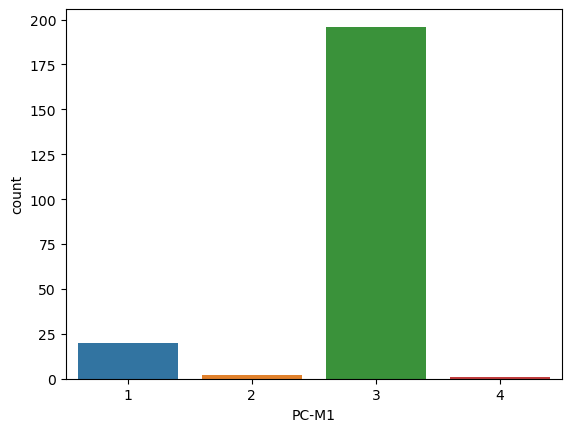

In [22]:
sns.countplot(x = df1['PC-M1'])
plt.show()

In [23]:
df.head()

,Response,SendTime,RecTime,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,TimeOfResponse
0,0,11/8/2023 21:45,11/9/2023 21:45,8,3,1,0,0,0,9,3,1,0,0,0,8.481981
1,0,11/8/2023 21:50,11/8/2023 21:55,8,3,1,0,0,0,8,3,1,0,0,0,3.448191
2,0,11/8/2023 21:55,11/8/2023 22:00,6,3,1,0,0,0,9,3,1,0,0,0,4.154956
3,0,11/8/2023 22:00,11/8/2023 22:05,8,3,1,0,0,0,8,3,1,0,0,0,6.981599
4,0,11/8/2023 22:05,11/8/2023 22:10,7,3,1,0,0,0,9,3,1,0,0,0,11.389429


In [24]:
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6364\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Response,WC-M1,PC-M1,EC-M1,IC-M1,VC-M1,LC-M1,WC-M2,PC-M2,EC-M2,IC-M2,VC-M2,LC-M2,TimeOfResponse
Response,1.000000,0.277410,-0.335809,-0.290275,0.150170,0.150170,NaN,0.626026,-0.964206,-0.290275,0.150170,0.150170,NaN,-0.767097
WC-M1,0.277410,1.000000,-0.332529,-0.464071,0.168566,0.091012,NaN,0.114512,-0.304480,-0.464071,0.168566,0.091012,NaN,-0.268832
PC-M1,-0.335809,-0.332529,1.000000,0.698721,0.043542,0.043542,NaN,-0.207488,0.323534,0.698721,0.043542,0.043542,NaN,0.264410
EC-M1,-0.290275,-0.464071,0.698721,1.000000,-0.307528,-0.307528,NaN,-0.216464,0.300922,1.000000,-0.307528,-0.307528,NaN,0.245714
IC-M1,0.150170,0.168566,0.043542,-0.307528,1.000000,-0.018605,NaN,0.155851,-0.144795,-0.307528,1.000000,-0.018605,NaN,-0.130336
VC-M1,0.150170,0.091012,0.043542,-0.307528,-0.018605,1.000000,NaN,0.079323,-0.144795,-0.307528,-0.018605,1.000000,NaN,-0.146390
LC-M1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WC-M2,0.626026,0.114512,-0.207488,-0.216464,0.155851,0.079323,NaN,1.000000,-0.583934,-0.216464,0.155851,0.079323,NaN,-0.487167
PC-M2,-0.964206,-0.304480,0.323534,0.300922,-0.144795,-0.144795,NaN,-0.583934,1.000000,0.300922,-0.144795,-0.144795,NaN,0.718175
EC-M2,-0.290275,-0.464071,0.698721,1.000000,-0.307528,-0.307528,NaN,-0.216464,0.300922,1.000000,-0.307528,-0.307528,NaN,0.245714


In [25]:
df1.columns


Index(['Response', 'WC-M1', 'PC-M1', 'EC-M1', 'IC-M1', 'VC-M1', 'LC-M1',
       'WC-M2', 'PC-M2', 'EC-M2', 'IC-M2', 'VC-M2', 'LC-M2', 'TimeOfResponse'],
      dtype='object')

In [26]:
df2 = df1.drop(['IC-M1', 'VC-M1', 'LC-M1', 'IC-M2', 'VC-M2', 'LC-M2'],axis =1)

In [27]:
df2.columns

Index(['Response', 'WC-M1', 'PC-M1', 'EC-M1', 'WC-M2', 'PC-M2', 'EC-M2',
       'TimeOfResponse'],
      dtype='object')

In [28]:
df2.head()

,Response,WC-M1,PC-M1,EC-M1,WC-M2,PC-M2,EC-M2,TimeOfResponse
0,0,8,3,1,9,3,1,8.0
1,0,8,3,1,8,3,1,3.0
2,0,6,3,1,9,3,1,4.0
3,0,8,3,1,8,3,1,7.0
4,0,7,3,1,9,3,1,11.0


In [29]:
X = df2.drop(['Response'],axis=1)
y = df2['Response']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

In [33]:
def compute_loss(X, y, w):
    m = len(y)
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)
    loss = -1 /  len(X) * (np.dot(y.T, np.log(y_hat)) + np.dot((1 - y).T, np.log(1 - y_hat)))
    return loss

In [34]:
def gradientDescent(X, y, w, b,lr, itr):
    J_history = []

    
    for i in range(itr):
        z = np.dot(X, w) + b
        y_hat = sigmoid(z)
        error = y_hat - y

        
        dw = np.dot(X.T, error) / len(X)
        db = np.sum(error) / len(X)
        
        w -= lr * dw
        b -= lr * db
        
        cost = compute_loss(X,y,w)
#         -1 /  len(X) * (np.dot(y.T, np.log(y_hat)) + np.dot((1 - y).T, np.log(1 - y_hat)))
        J_history.append(cost)
        

    return w, b, J_history

# Evalvating Training Data

C:\Users\DELL\AppData\Local\Temp\ipykernel_6364\3354436464.py:5: RuntimeWarning: divide by zero encountered in log
  loss = -1 /  len(X) * (np.dot(y.T, np.log(y_hat)) + np.dot((1 - y).T, np.log(1 - y_hat)))


The Initial cost with lr: 0.001  is nan , w is: [ 0.14, -0.35, 0.74, 0.33, 1.01, -1.21, -1.10 ], b is: -0.15
The Final cost with lr: 0.001  is 0.246 , w is: [ 0.14, -0.35, 0.74, 0.33, 1.01, -1.21, -1.10 ], b is: -0.39


The Initial cost with lr: 0.006  is 0.245 , w is: [ 0.10, -0.53, 0.68, 0.82, 0.23, -1.27, -1.58 ], b is: -0.15
The Final cost with lr: 0.006  is 0.142 , w is: [ 0.10, -0.53, 0.68, 0.82, 0.23, -1.27, -1.58 ], b is: -0.17


The Initial cost with lr: 0.05  is 0.142 , w is: [ 0.31, -0.79, 0.63, 1.63, -2.48, -1.33, -1.88 ], b is: -0.15
The Final cost with lr: 0.05  is 0.045 , w is: [ 0.31, -0.79, 0.63, 1.63, -2.48, -1.33, -1.88 ], b is: -0.17


The Initial cost with lr: 0.008  is 0.045 , w is: [ 0.34, -0.80, 0.63, 1.67, -2.72, -1.33, -1.88 ], b is: -0.15
The Final cost with lr: 0.008  is 0.041 , w is: [ 0.34, -0.80, 0.63, 1.67, -2.72, -1.33, -1.88 ], b is: -0.15


The Initial cost with lr: 0.0009  is 0.041 , w is: [ 0.35, -0.80, 0.63, 1.67, -2.74, -1.33, -1.89 ], b is: -0.15

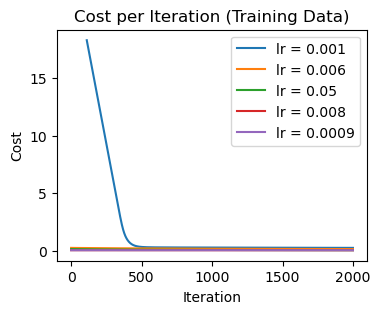

In [35]:
np.random.seed(0)
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
lr = [0.001, 0.006, 0.05, 0.008, 0.0009]

iterations = 2000

plt.figure(figsize=(4, 3))

for i, l in enumerate(lr):
    w_final, b_final, J_hist = gradientDescent(x_train, y_train, w, b, l, iterations)
    plt.plot(range(iterations), J_hist, label=f'lr = {l}', color=f'C{i}')
    print(f"The Initial cost with lr: {l}  is {J_hist[0]:.3f} , w is: [ {', '.join(map(lambda x: f'{x:.2f}', w))} ], b is: {b:.2f}")
    print(f"The Final cost with lr: {l}  is {J_hist[-1]:.3f} , w is: [ {', '.join(map(lambda x: f'{x:.2f}', w_final))} ], b is: {b_final:.2f}")
    
    print("\n")
    
    plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Training Data)')
plt.savefig('myplotTr.png')

plt.show()


## Accuracy of Training DataSet

In [36]:
y_train_predicted = np.dot(x_train, w_final) + b_final
y_predTr = [1 if x >= 0.5 else 0 for x in y_train_predicted]
df3 = pd.DataFrame({'Actual Response': y_train, 'Predicted Response':y_predTr})
df3.sample(5)

,Actual Response,Predicted Response
33,1,1
125,1,1
173,1,1
112,0,0
61,1,1


In [37]:
mean_actual = np.mean(y_train)
sst = np.sum((y_train - mean_actual) ** 2)
# Calculate the sum of squared residuals (SSR)
ssr = np.sum((y_predTr - y_train) ** 2)
# Calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared (Training Data): {r_squared*100:.1f} %")

R-squared (Training Data): 95.3 %


# Evalvating Testing Data

C:\Users\DELL\AppData\Local\Temp\ipykernel_6364\3354436464.py:5: RuntimeWarning: divide by zero encountered in log
  loss = -1 /  len(X) * (np.dot(y.T, np.log(y_hat)) + np.dot((1 - y).T, np.log(1 - y_hat)))


The Initial cost with lr: 0.001  is nan , w is: [ 0.38, -0.42, 1.04, 0.88, -0.62, -0.92, -1.71 ], b is: -0.41
The Final cost with lr: 0.001  is 0.142 , w is: [ 0.38, -0.42, 1.04, 0.88, -0.62, -0.92, -1.71 ], b is: -0.41


The Initial cost with lr: 0.6  is 0.202 , w is: [ 2.79, 0.33, 4.10, 1.82, -12.27, 2.15, -2.47 ], b is: 0.23
The Final cost with lr: 0.6  is 0.000 , w is: [ 2.79, 0.33, 4.10, 1.82, -12.27, 2.15, -2.47 ], b is: 0.23


The Initial cost with lr: 0.05  is 0.000 , w is: [ 2.84, 0.35, 4.14, 1.84, -12.41, 2.18, -2.43 ], b is: -0.14
The Final cost with lr: 0.05  is 0.000 , w is: [ 2.84, 0.35, 4.14, 1.84, -12.41, 2.18, -2.43 ], b is: -0.14


The Initial cost with lr: 8e-08  is 0.000 , w is: [ 2.84, 0.35, 4.14, 1.84, -12.41, 2.18, -2.43 ], b is: -0.15
The Final cost with lr: 8e-08  is 0.000 , w is: [ 2.84, 0.35, 4.14, 1.84, -12.41, 2.18, -2.43 ], b is: -0.15


The Initial cost with lr: 0.0009  is 0.000 , w is: [ 2.84, 0.35, 4.14, 1.84, -12.41, 2.18, -2.43 ], b is: -0.15
The Fina

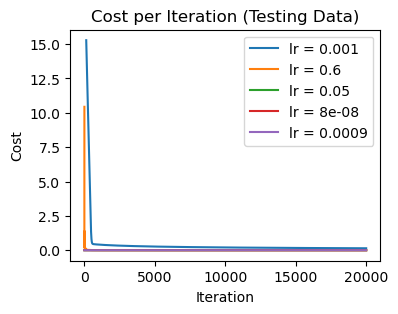

In [38]:
np.random.seed(0)
w = np.random.randn(x_train.shape[1])
b = np.random.randn()
lr = [0.001, 0.6, 0.05, 0.00000008, 0.0009]

iterations = 20000

plt.figure(figsize=(4, 3))

for i, l in enumerate(lr):
    w_final, b_final, J_hist = gradientDescent(x_test, y_test, w, b, l, iterations)
    plt.plot(range(iterations), J_hist, label=f'lr = {l}', color=f'C{i}')
    print(f"The Initial cost with lr: {l}  is {J_hist[0]:.3f} , w is: [ {', '.join(map(lambda x: f'{x:.2f}', w_final))} ], b is: {b_final:.2f}")
    print(f"The Final cost with lr: {l}  is {J_hist[-1]:.3f} , w is: [ {', '.join(map(lambda x: f'{x:.2f}', w_final))} ], b is: {b_final:.2f}")
    print("\n")

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost per Iteration (Testing Data)')
plt.savefig('myplot.png')

plt.show()


## Accuracy on Testing Dataset

In [39]:
y_test_predicted = np.dot(x_test, w_final) + b_final
y_predTest = [1 if x >= 0.5 else 0 for x in y_test_predicted]
df1 = pd.DataFrame({'Actual Response': y_test, 'Predicted Response':y_predTest})
df1.sample(5)

,Actual Response,Predicted Response
35,0,0
34,0,0
42,0,0
27,0,0
11,0,0


In [40]:
mean_actual = np.mean(y_test)
sst = np.sum((y_test - mean_actual) ** 2)
# Calculate the sum of squared residuals (SSR)
ssr = np.sum((y_predTest - y_test) ** 2)
# Calculate R-squared
r_squared = 1 - (ssr / sst)
print(f"R-squared (Testing Data): {r_squared*100:.1f}%")

R-squared (Testing Data): 100.0%


# Using Sklearn Logistic Regression Model

In [41]:
model = LogisticRegression(verbose=1)

In [42]:
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [43]:
y_pred = model.predict(x_test)


In [45]:
accuracy = accuracy_score(y_test, y_pred)
final_w = model.coef_
final_b = model.intercept_

print(f'Final w is: {final_w}')
print(f'Final b is: {final_b}')
print(f'Accuracy: {(accuracy*100):.2f}%')

Final w is: [[ 0.19226735 -0.4294272  -0.17294011  1.11597653 -2.80913736 -0.17294011
  -1.31128794]]
Final b is: [2.40106852]
Accuracy: 97.73%


In [46]:
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Plot scikit-learn's learning curve
# plt.plot(range(1, iterations+1), J_hist, label='Custom Logistic Predictor')
# plt.plot(range(1, iterations+1), compute_loss(X_train_bias, y_train, model.coef_[0]), label='Scikit-learn Logistic Predictor', linestyle='dashed')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.title('Learning Curve Comparison')
# plt.legend()
# plt.show()

NameError: name 'X_train' is not defined